<a href="https://colab.research.google.com/github/fralfaro/MAT306/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT306 - Laboratorio N°08

**Objetivo**: Aplicar técnicas de **machine learning no supervisado** para explorar, procesar y analizar conjuntos de datos con variables numéricas y categóricas.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.


## Clustering


<img src="https://www.svgrepo.com/show/253022/car.svg" width = "300" align="center"/>



El conjunto de datos **`vehiculos_procesado_con_grupos.csv`** recopila información sobre diversas características relevantes de distintos vehículos. El propósito de este ejercicio es **clasificar los vehículos en diferentes categorías**, utilizando como base las variables descritas en la tabla de atributos.

El análisis presenta un desafío adicional debido a la **naturaleza mixta de los datos**: se incluyen tanto variables **numéricas** (ej. dimensiones, consumo, emisiones) como **categóricas** (ej. tipo de tracción, tipo de combustible), lo que requiere aplicar técnicas de preprocesamiento adecuadas antes de entrenar los modelos.

Como primer paso, procederemos a **cargar y explorar el conjunto de datos**, con el fin de familiarizarnos con su estructura y las características que servirán como base para la posterior clasificación.




**Descripción de los Datos:**

| **Nombre de la Columna**   | **Descripción**                                                                                                                                   |
|----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| **year**                   | El año en que el vehículo fue fabricado.                                                                                                          |
| **desplazamiento**          | La capacidad volumétrica del motor en litros. Indica la cantidad de aire y combustible que puede desplazar el motor durante una revolución.       |
| **cilindros**               | El número de cilindros que tiene el motor. Los cilindros son las cámaras donde ocurre la combustión interna en los motores de los vehículos.       |
| **co2**                     | Emisiones de dióxido de carbono del vehículo, medido en gramos por kilómetro. Es una medida de las emisiones de gases de efecto invernadero.       |
| **clase_tipo**              | La clase o tipo de vehículo, como vehículos especiales, deportivos, etc.                                                                         |
| **traccion_tipo**           | Tipo de tracción del vehículo, ya sea tracción en dos ruedas, en cuatro ruedas o en todas las ruedas.                                             |
| **transmision_tipo**        | Tipo de transmisión del vehículo, como automática, manual, entre otros.                                                                          |
| **combustible_tipo**        | Tipo de combustible que utiliza el vehículo, como gasolina, diésel, eléctrico, híbrido, etc.                                                     |
| **tamano_motor_tipo**       | Clasificación del tamaño del motor (por ejemplo, pequeño, mediano o grande), que generalmente se basa en la capacidad de desplazamiento.           |
| **consumo_tipo**            | Clasificación del nivel de consumo de combustible del vehículo, indicando si es alto, bajo, o muy alto.                                           |
| **co2_tipo**                | Clasificación de las emisiones de CO2 del vehículo, indicando si es alto, bajo, o muy alto.                                                       |
| **consumo_litros_milla**    | El consumo de combustible del vehículo, medido en litros por milla. Indica la eficiencia del vehículo en términos de consumo de combustible.        |



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline

sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT306/main/docs/labs/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

- Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.
- Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

- Junte ambos dataset en uno, llamado **df_procesado**.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  36791 non-null  int64  
 1   desplazamiento        36789 non-null  float64
 2   cilindros             36788 non-null  float64
 3   co2                   36791 non-null  float64
 4   clase_tipo            36791 non-null  object 
 5   traccion_tipo         36791 non-null  object 
 6   transmision_tipo      36791 non-null  object 
 7   combustible_tipo      36791 non-null  object 
 8   tamano_motor_tipo     36789 non-null  object 
 9   consumo_tipo          36791 non-null  object 
 10  co2_tipo              36791 non-null  object 
 11  consumo_litros_milla  36791 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 3.4+ MB


In [4]:
df.select_dtypes(include=[np.number])

variables_num = df.select_dtypes(include=[np.number]).columns.tolist()
variables_cat = df.select_dtypes(include=["object"]).columns.tolist()

print("Variables numericas: ", variables_num)
print("Variables categoricas: ", variables_cat)

Variables numericas:  ['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla']
Variables categoricas:  ['clase_tipo', 'traccion_tipo', 'transmision_tipo', 'combustible_tipo', 'tamano_motor_tipo', 'consumo_tipo', 'co2_tipo']


In [5]:
#variables numéricas
df_num = df[variables_num].copy()
df_num = df_num.fillna(df_num.mean())

scaler = MinMaxScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns, index=df_num.index)

df_num_scaled.head()


,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [6]:
# Crear dataset con variables categóricas
df_cat = df[variables_cat].copy()

df_cat_encode = pd.get_dummies(df_cat, prefix_sep='_', drop_first=False)

df_cat_encode.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,False,False,False,False,False,False,False,True,False,True,...,True,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,False,False,False,True,False,True,...,True,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,True,False,True,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,True,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,False


La codificación one-hot transforma variables categóricas en numéricas creando columnas binarias para cada categoría, donde cada registro activa con 1 solo la columna de su categoría específica y las demás permanecen en 0. Esta aproximación elimina completamente cualquier jerarquía artificial entre categorías que podría sesgar los algoritmos de machine learning, aunque como contrapartida incrementa significativamente el número de dimensiones cuando las variables originales contienen muchas categorías distintas.

In [7]:
df_procesado = pd.concat([df_num_scaled, df_cat_encode], axis=1)

df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,0.000000,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0.029412,0.243590,0.142857,0.424351,0.360294,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
3,0.029412,0.461538,0.285714,0.527672,0.475113,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0.088235,0.410256,0.285714,0.424351,0.360294,False,False,False,True,False,...,True,False,False,False,False,True,False,False,False,False


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [8]:
num_cluster = 8
kmeans = KMeans(n_clusters=num_cluster, random_state=25, n_init=10)
kmeans.fit(df_procesado)

clusters = kmeans.labels_
df_procesado["cluster"] = num_cluster
#df['cluster'] = clusters  

In [9]:
df_numeric_original = df[variables_num].copy()
df_categorical_original = df[variables_cat].copy()

df_numeric_original["cluster"] = clusters
df_categorical_original["cluster"] = clusters

promedios_numericas = df_numeric_original.groupby("cluster")[variables_num].mean()

print("Promedio de variables numéricas por cluster:")
print(promedios_numericas.round(4))

def calcular_moda(series):

    moda = series.mode()
    if len(moda) > 0:
        return moda[0]
    else:
        return 'Sin datos'

moda_categoricas = df_categorical_original.groupby("cluster").agg(calcular_moda)

print("\n\nModa de variables categóricas por cluster:")
print(moda_categoricas)


Promedio de variables numéricas por cluster:
              year  desplazamiento  cilindros       co2  consumo_litros_milla
cluster                                                                      
0        2000.2676          4.1180     6.5844  537.7517                0.2285
1        2003.6041          2.7128     4.9506  407.8128                0.1732
2        1998.9092          1.8434     3.9755  329.4630                0.1397
3        1997.8583          3.1852     5.5958  468.5226                0.1994
4        1998.0112          5.0939     7.8821  657.8534                0.2791
5        2007.6428          1.9976     4.1083  326.8934                0.1398
6        1998.5166          2.3455     4.4308  406.9010                0.1729
7        2004.0168          3.4259     6.1936  468.3307                0.1995


Moda de variables categóricas por cluster:
              clase_tipo traccion_tipo transmision_tipo combustible_tipo  \
cluster                                               

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

Clusters: 5 - Inercia: 102310
Clusters: 10 - Inercia: 84706
Clusters: 20 - Inercia: 67073
Clusters: 30 - Inercia: 55954
Clusters: 50 - Inercia: 44888
Clusters: 75 - Inercia: 36797
Clusters: 100 - Inercia: 30896
Clusters: 200 - Inercia: 17626
Clusters: 300 - Inercia: 11235


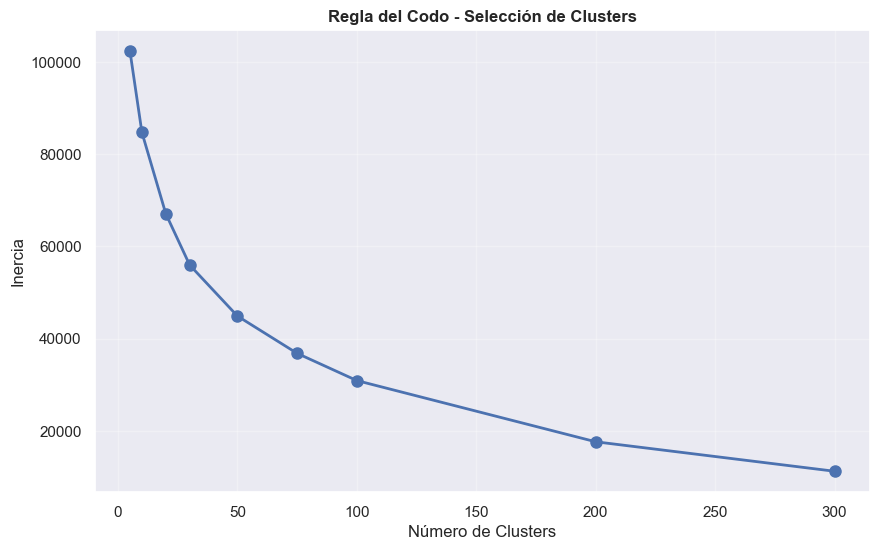

In [10]:
n_clusters_list = [5, 10, 20, 30, 50, 75, 100, 200, 300]
inertias = []

for n_clusters in n_clusters_list:

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_procesado.drop('cluster', axis=1))

    inertias.append(kmeans.inertia_)
    print(f"Clusters: {n_clusters} - Inercia: {kmeans.inertia_:.0f}")


plt.figure(figsize=(10, 6))
plt.plot(n_clusters_list, inertias, 'bo-', linewidth=2, markersize=8)

plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Regla del Codo - Selección de Clusters', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.show()

Mirando el gráfico de la regla del codo, la verdad es que no se ve un quiebre claro en la curva. La línea va bajando suavemente conforme aumentan los clusters, pero no hay ese punto donde de repente deja de mejorar tanto. Eso me hace pensar que en estos datos de vehículos no hay grupos naturales muy marcados, sino que más bien las características van cambiando de forma gradual entre un tipo de auto y otro.

Como no hay un número ideal que salte a la vista, toca elegir basándose en lo que sea más práctico. Los 8 clusters que usamos al principio no están mal para tener una idea general, pero si quisiéramos más detalle podríamos probar con 20 o 30. Al final, es un poco arbitrario porque los datos no muestran agrupaciones muy definidas.

Al observar el gráfico resultante, se pueden obtener conclusiones sobre el número apropiado de clusters. La regla del codo sugiere elegir el número de clusters donde la reducción en la inercia se estabiliza significativamente. En otras palabras, se busca el punto en el gráfico donde la curva de inercia comienza a aplanarse o forma un codo.

## Reducción de Dimensionalidad

<img src="https://1000logos.net/wp-content/uploads/2020/11/Wine-Logo-old.png" width = "300" align="center"/>


Para este ejercicio utilizaremos el **Wine Dataset**, un conjunto de datos clásico disponible en la librería **scikit-learn** y en el repositorio de la **UCI Machine Learning**.
Este dataset contiene información de **178 muestras de vino** provenientes de la región italiana de *Piamonte*. Cada vino pertenece a una de **tres variedades de uva** (*clases*), que actúan como etiquetas para el análisis supervisado, pero aquí se usarán solo como referencia en la visualización.

Cada muestra está descrita por **13 variables químicas** obtenidas de un análisis de laboratorio, entre ellas:

* **Alcohol**: porcentaje de alcohol en el vino.
* **Malic acid**: concentración de ácido málico.
* **Ash**: contenido de ceniza.
* **Alcalinity of ash**: alcalinidad de la ceniza.
* **Magnesium**: cantidad de magnesio (mg/L).
* **Total phenols**: concentración total de fenoles.
* **Flavanoids**: tipo de fenoles con propiedades antioxidantes.
* **Nonflavanoid phenols**: fenoles que no son flavonoides.
* **Proanthocyanins**: compuestos relacionados con el color y el sabor.
* **Color intensity**: intensidad del color del vino.
* **Hue**: matiz del color.
* **OD280/OD315 of diluted wines**: relación de absorbancia que mide la calidad del vino.
* **Proline**: concentración de prolina (un aminoácido).

Estas características permiten representar cada vino como un punto en un espacio de **13 dimensiones**.

El objetivo del análisis con este dataset es **reducir la dimensionalidad** para visualizar y explorar patrones en los datos. Para ello aplicaremos:

* **PCA (Principal Component Analysis):** identificar las combinaciones lineales de variables que explican la mayor varianza en el conjunto.
* **t-SNE (t-distributed Stochastic Neighbor Embedding):** mapear las muestras a 2D o 3D, preservando relaciones de vecindad y estructuras no lineales.

La comparación entre ambas técnicas permitirá observar cómo las tres clases de vinos se diferencian en el espacio reducido y discutir la utilidad de la reducción de dimensionalidad en datos con mayor número de variables que en el caso del dataset Iris.



In [11]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [12]:
# cargar dataset
dataset = load_wine()

# nombres de las variables
features = dataset.feature_names
target = 'wine_class'

# construir DataFrame
wine = pd.DataFrame(dataset.data, columns=features)
wine['target'] = dataset.target

# ver primeras filas
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0




### 1. **Análisis detallado con PCA**

* Calcular la **varianza explicada** por cada componente principal y representar el gráfico de varianza acumulada, identificando cuántos componentes son necesarios para capturar al menos el **90–95% de la información**.
* Construir tablas y gráficos que muestren cómo las observaciones (vinos) se proyectan en las primeras componentes principales.
* Analizar los **loadings** (coeficientes de cada variable en los componentes) e interpretar qué características químicas del vino (alcohol, fenoles, color, etc.) tienen mayor influencia en las nuevas dimensiones.
* Visualizar los datos reducidos a 2D o 3D e interpretar si las **tres variedades de vino** se separan de forma clara en el espacio proyectado.



In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [14]:
X = wine[features].values
y = wine['target'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine[features])

90% varianza: 8 componentes
95% varianza: 10 componentes


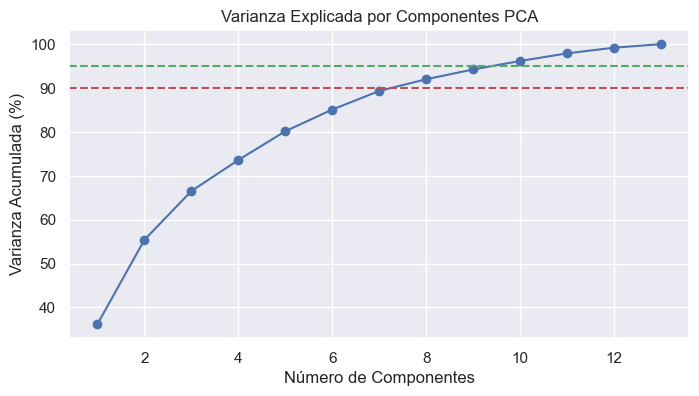

In [15]:
# Análisis de varianza PCA
pca_full = PCA()
pca_full.fit(X_scaled)

varianza_acumulada = np.cumsum(pca_full.explained_variance_ratio_)

n_90 = np.argmax(varianza_acumulada >= 0.90) + 1
n_95 = np.argmax(varianza_acumulada >= 0.95) + 1

print(f"90% varianza: {n_90} componentes")
print(f"95% varianza: {n_95} componentes")

plt.figure(figsize=(8, 4))

plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada*100, 'bo-')
plt.axhline(y=90, color='r', linestyle='--', label='90%')
plt.axhline(y=95, color='g', linestyle='--', label='95%')

plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Acumulada (%)")
plt.title("Varianza Explicada por Componentes PCA")

plt.show()

• Varianza PC1: 36.2%
• Varianza PC2: 19.2%
• Total 2D: 55.4%


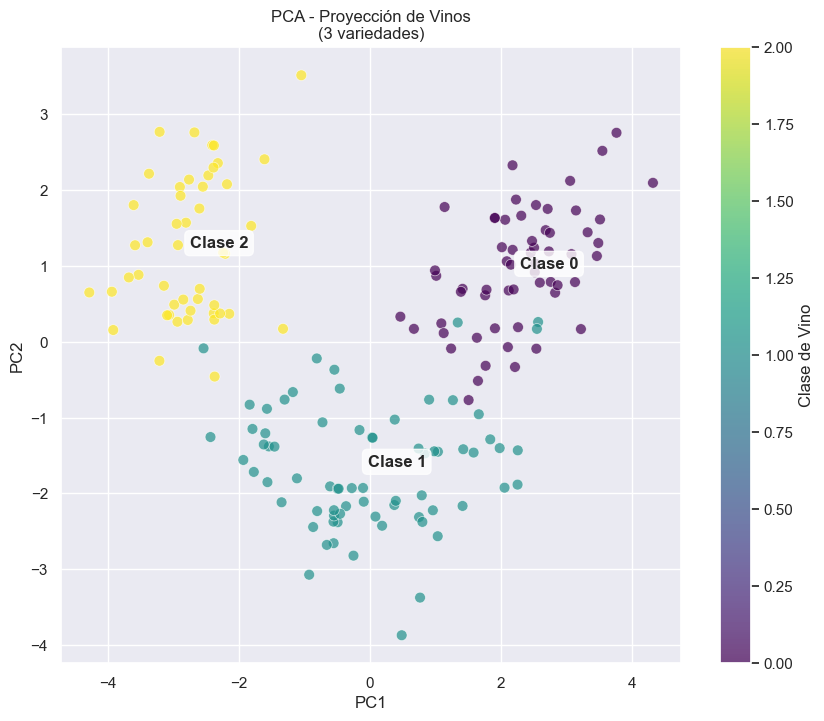

In [16]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"• Varianza PC1: {pca_2d.explained_variance_ratio_[0]*100:.1f}%")
print(f"• Varianza PC2: {pca_2d.explained_variance_ratio_[1]*100:.1f}%")
print(f"• Total 2D: {sum(pca_2d.explained_variance_ratio_)*100:.1f}%")


plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.7, s=60, edgecolors='w', linewidth=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.title("PCA - Proyección de Vinos\n(3 variedades)")
plt.colorbar(scatter, label="Clase de Vino")


for class_id in [0, 1, 2]:
    mask = y == class_id
    plt.text(np.mean(X_pca_2d[mask, 0]), np.mean(X_pca_2d[mask, 1]), 
             f'Clase {class_id}', fontsize=12, fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.show()

In [17]:
loadings = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)

print("Coeficientes de las componentes:")
print(loadings.round(4))

print("\nVARIABLES MÁS INFLUYENTES:")

print("En PC1 (mayor influencia):")
pc1_top = loadings['PC1'].abs().sort_values(ascending=False).head(5)

for var in pc1_top.index:

    sign = "POSITIVA" if loadings.loc[var, 'PC1'] > 0 else "NEGATIVA"
    print(f"  {var}: {loadings.loc[var, 'PC1']:.3f} (influencia {sign})")

print("\nEn PC2 (mayor influencia):")
pc2_top = loadings['PC2'].abs().sort_values(ascending=False).head(5)

for var in pc2_top.index:
    
    sign = "POSITIVA" if loadings.loc[var, 'PC2'] > 0 else "NEGATIVA"
    print(f"  {var}: {loadings.loc[var, 'PC2']:.3f} (influencia {sign})")



Coeficientes de las componentes:
                                 PC1     PC2
alcohol                       0.1443  0.4837
malic_acid                   -0.2452  0.2249
ash                          -0.0021  0.3161
alcalinity_of_ash            -0.2393 -0.0106
magnesium                     0.1420  0.2996
total_phenols                 0.3947  0.0650
flavanoids                    0.4229 -0.0034
nonflavanoid_phenols         -0.2985  0.0288
proanthocyanins               0.3134  0.0393
color_intensity              -0.0886  0.5300
hue                           0.2967 -0.2792
od280/od315_of_diluted_wines  0.3762 -0.1645
proline                       0.2868  0.3649

VARIABLES MÁS INFLUYENTES:
En PC1 (mayor influencia):
  flavanoids: 0.423 (influencia POSITIVA)
  total_phenols: 0.395 (influencia POSITIVA)
  od280/od315_of_diluted_wines: 0.376 (influencia POSITIVA)
  proanthocyanins: 0.313 (influencia POSITIVA)
  nonflavanoid_phenols: -0.299 (influencia NEGATIVA)

En PC2 (mayor influencia):
  color

• PC1: 36.2% varianza
• PC2: 19.2% varianza
• PC3: 11.1% varianza
• Total 3D: 66.5% varianza


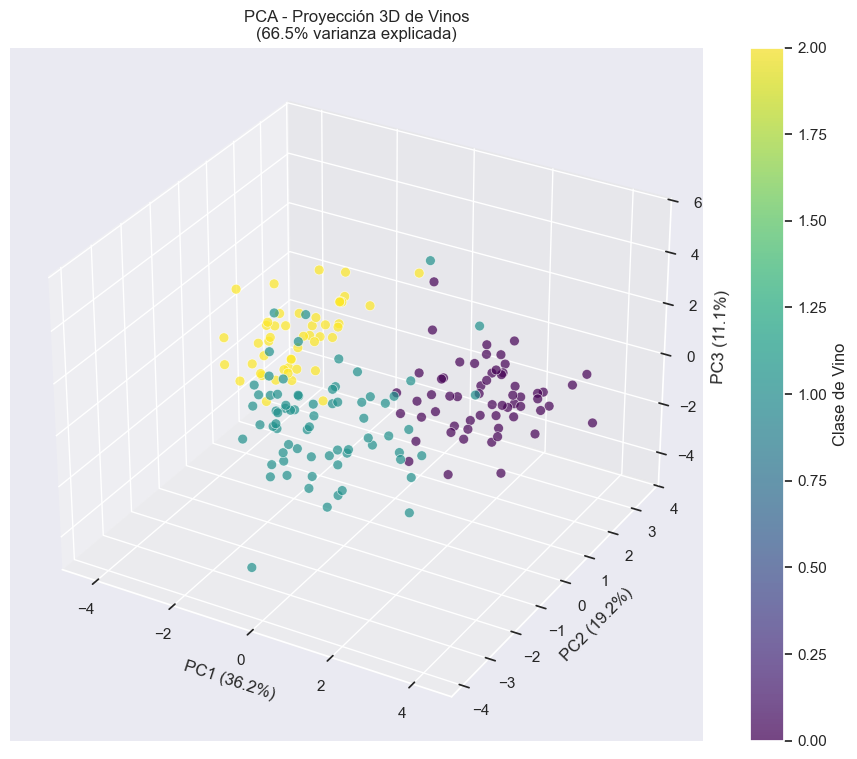

In [18]:
# Aplicar PCA con 3 componentes
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

for i, var in enumerate(pca_3d.explained_variance_ratio_, 1):

    print(f"• PC{i}: {var*100:.1f}% varianza")

print(f"• Total 3D: {sum(pca_3d.explained_variance_ratio_)*100:.1f}% varianza")


fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                    c=y, cmap='viridis', s=50, alpha=0.7, edgecolors='w', linewidth=0.5)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)')

ax.set_title(f'PCA - Proyección 3D de Vinos\n({sum(pca_3d.explained_variance_ratio_)*100:.1f}% varianza explicada)')

plt.colorbar(scatter, ax=ax, label='Clase de Vino')
plt.show()

Los resultados del PCA revelan que las tres variedades de vino se separan claramente en el espacio reducido, donde la primera componente principal está dominada por atributos fenólicos como flavanoids y total phenols, mientras que la segunda componente refleja principalmente el contenido de alcohol, intensidad de color y prolina. Esto indica que los compuestos fenólicos y las características relacionadas con el cuerpo del vino son los factores químicos más determinantes para distinguir entre las variedades.

### 2. **Análisis detallado con t-SNE**

* Aplicar **t-SNE** para reducir los datos a 2 dimensiones, probando diferentes configuraciones de hiperparámetros como *perplexity* y *learning rate*.
* Comparar las distintas visualizaciones obtenidas y discutir cómo los hiperparámetros afectan la estructura de los clústeres.
* Analizar si las **tres clases de vinos** forman agrupaciones definidas y si t-SNE logra capturar relaciones no lineales que PCA no refleja.



In [19]:
from sklearn.manifold import TSNE

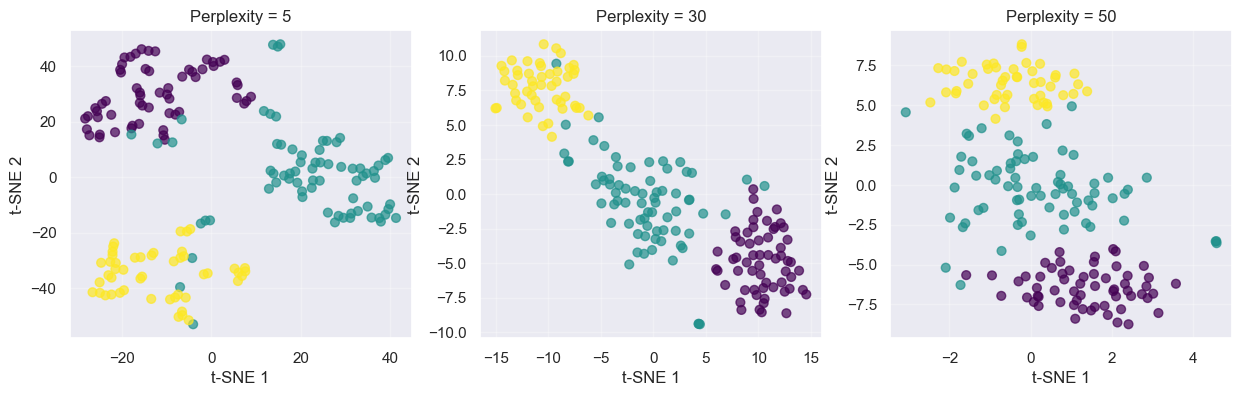

In [20]:
# Probar diferentes perplexities
perple = [5, 30, 50]
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, perplexity in enumerate(perple):

    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, max_iter=1000)
    X_tsne = tsne.fit_transform(X_scaled)
    
    axes[i].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7, s=40)
    axes[i].set_title(f'Perplexity = {perplexity}')
    
    axes[i].set_xlabel('t-SNE 1')
    axes[i].set_ylabel('t-SNE 2')

    axes[i].grid(True, alpha=0.3)

plt.show()

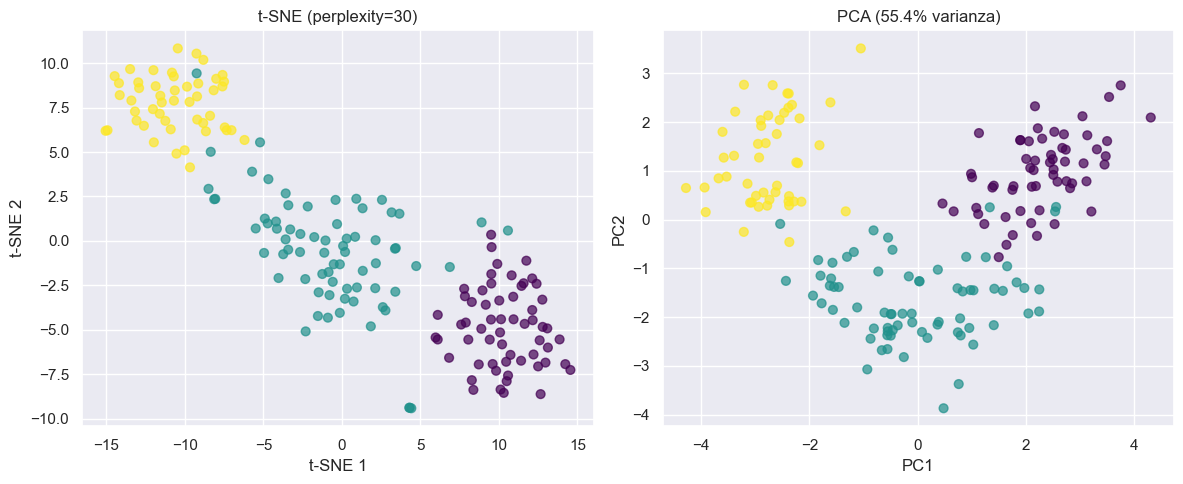

In [21]:
tsne_optimal = TSNE(n_components=2, perplexity=30, random_state=42, max_iter=1000)
X_tsne = tsne_optimal.fit_transform(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7, s=40)

ax1.set_title('t-SNE (perplexity=30)')
ax1.set_xlabel('t-SNE 1')
ax1.set_ylabel('t-SNE 2')

ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, s=40)

ax2.set_title(f'PCA ({pca.explained_variance_ratio_.sum()*100:.1f}% varianza)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')

plt.tight_layout()
plt.show()

Mirando los gráficos, la diferencia salta a la vista. Con t-SNE los tres tipos de vino se separan limpiamiente, cada uno en su zona, sin mezclarse como pasaba con PCA. Es como si t-SNE encontrara la forma natural en que estos vinos se relacionan. Jugando con el perplexity se ve que si lo es muy bajo los grupos se rompen en pedazos, y si sube mucho se dispersan demasiado.



### 3. **Comparación entre PCA y t-SNE**

* Contrastar las visualizaciones y discutir las **ventajas y limitaciones** de cada técnica:

  * PCA como método **lineal** para interpretar varianza y relaciones globales.
  * t-SNE como método **no lineal** que preserva relaciones locales y vecindades.
* Evaluar en qué escenarios prácticos sería más recomendable usar PCA (interpretabilidad, reducción previa para modelos) o t-SNE (exploración y visualización de clústeres).
* Reflexionar sobre la **importancia de la reducción de dimensionalidad** en datasets de alta dimensión como Wine, destacando su utilidad para:

  * Visualizar patrones ocultos en los datos.
  * Reducir complejidad y ruido antes de aplicar algoritmos de aprendizaje automático.
  * Facilitar la interpretación y comunicación de resultados.



**PCA vs t-SNE**

El análisis comparativo revela diferencias fundamentales entre ambas técnicas. PCA, como método lineal, destaca por su capacidad para identificar las direcciones de máxima varianza y ofrecer una interpretación clara de las variables más influyentes mediante los loadings. Su naturaleza determinística y eficiencia computacional lo hacen ideal para una reducción inicial de dimensionalidad.

Por otro lado, t-SNE demuestra superioridad en la visualización de estructuras locales y relaciones no lineales, generando agrupaciones más compactas y mejor definidas. Sin embargo, esta ventaja viene acompañada de una mayor sensibilidad a los hiperparámetros y la pérdida de información sobre distancias globales.

en conclusion, PCA resulta más adecuado para etapas iniciales de análisis y como preprocesamiento para modelos predictivos, mientras que t-SNE es preferible para exploración de datos y comunicación visual de resultados.
 
La reducción de dimensionalidad se consolida como una herramienta esencial en datasets multivariados como Wine, permitiendo no solo visualizar patrones ocultos, sino también reducir ruido y complejidad computacional, facilitando tanto el análisis técnico como la interpretación de resultados para audiencias no especializadas.

